In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(context="notebook", style="darkgrid")


In [10]:
tb_nypd = pd.read_csv('data/nypd_crime_pct.csv')
tb_nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ADDR_PCT_CD                     77 non-null     float64
 1   assault_3_&_related_offenses    77 non-null     float64
 2   criminal_mischief_&_related_of  77 non-null     float64
 3   dangerous_drugs                 77 non-null     float64
 4   felony_assault                  77 non-null     float64
 5   grand_larceny                   77 non-null     float64
 6   harrassment_2                   77 non-null     float64
 7   miscellaneous_penal_law         77 non-null     float64
 8   off._agnst_pub_ord_sensblty_&   77 non-null     float64
 9   petit_larceny                   77 non-null     float64
 10  robbery                         77 non-null     float64
dtypes: float64(11)
memory usage: 6.7 KB


In [11]:
cluster_vars = ['assault_3_&_related_offenses', 'criminal_mischief_&_related_of',
       'dangerous_drugs', 'felony_assault', 'grand_larceny', 'harrassment_2',
       'miscellaneous_penal_law', 'off._agnst_pub_ord_sensblty_&',
       'petit_larceny', 'robbery']

In [21]:
nypd_scaler = StandardScaler()
nypd_scaler.fit(tb_nypd[cluster_vars])

tb_sca_nypd = pd.DataFrame(nypd_scaler.transform(tb_nypd[cluster_vars]), columns = cluster_vars)
tb_sca_nypd.index = tb_nypd['ADDR_PCT_CD']
tb_sca_nypd.head()

,assault_3_&_related_offenses,criminal_mischief_&_related_of,dangerous_drugs,felony_assault,grand_larceny,harrassment_2,miscellaneous_penal_law,off._agnst_pub_ord_sensblty_&,petit_larceny,robbery
ADDR_PCT_CD,,,,,,,,,,
1.0,-1.769627,-1.848631,-0.465030,-1.640554,1.482863,-1.210202,-1.375525,1.161788,2.298396,-2.019062
5.0,-0.350660,-0.859256,-0.555377,0.303081,1.000618,-1.009768,-0.373630,-1.480392,0.965852,-0.399129
6.0,-0.912465,-1.657186,-0.341117,-1.049780,2.332003,-1.707208,-1.266258,-1.756760,1.485719,-0.617419
7.0,0.655259,0.302514,0.804196,-0.601945,-0.006138,-0.007575,-0.294899,-0.310603,-0.511687,-0.138799
9.0,-0.350534,-1.471704,0.813312,-0.587357,1.395447,-1.468496,-0.680153,-0.834014,0.578987,-0.343071


# Hierarchical Clustering

1. *Affinity* (or distance function)
    - *Eucliden*
    - *Cosine*
1. ***Linkage***
    - **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters: Compute all pairwise distances between observations in cluster A and in cluster B, and record the largest of these distances.
    - **Average linkage** minimizes the average of the distances between all observations of pairs of clusters. Compute all pairwise distance between the observations in cluster A and cluster B and record the average of these distances.
    - **Single linkage** minimizes the distance between the closest observations of pairs of clusters. Compute all pairwise distance between the observations in clusterA and cluster B and record the smallest of these distances.
    - **Ward** minimizes the error sum of squares (also known as variance) of cluster combinations.

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

We can use SciPy for visualizing the dendogram:

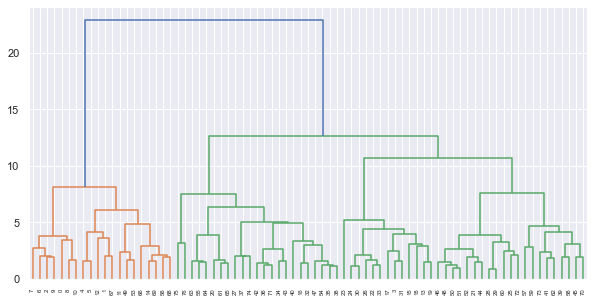

In [68]:
fig = plt.figure(figsize = (10, 5))
census_dendogram = dendrogram(linkage(tb_sca_nypd, method = 'ward'))

For calculating & fitting hierarchical clustering models we're better served by SKLEARN's `AgglomerativeClustering` class:

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [95]:
hc_fit = AgglomerativeClustering(n_clusters = 7, affinity='euclidean', linkage='ward')
hc_fit.fit(tb_sca_nypd)
tb_nypd['clu_ward'] = [str(x) for x in hc_fit.labels_]

In [96]:
tb_nypd_melt = tb_nypd.melt(id_vars = ['ADDR_PCT_CD', 'clu_ward'])

In [97]:
tb_nypd['clu_ward'].value_counts()

0    21
1    13
3    13
5    12
2     9
4     7
6     2
Name: clu_ward, dtype: int64

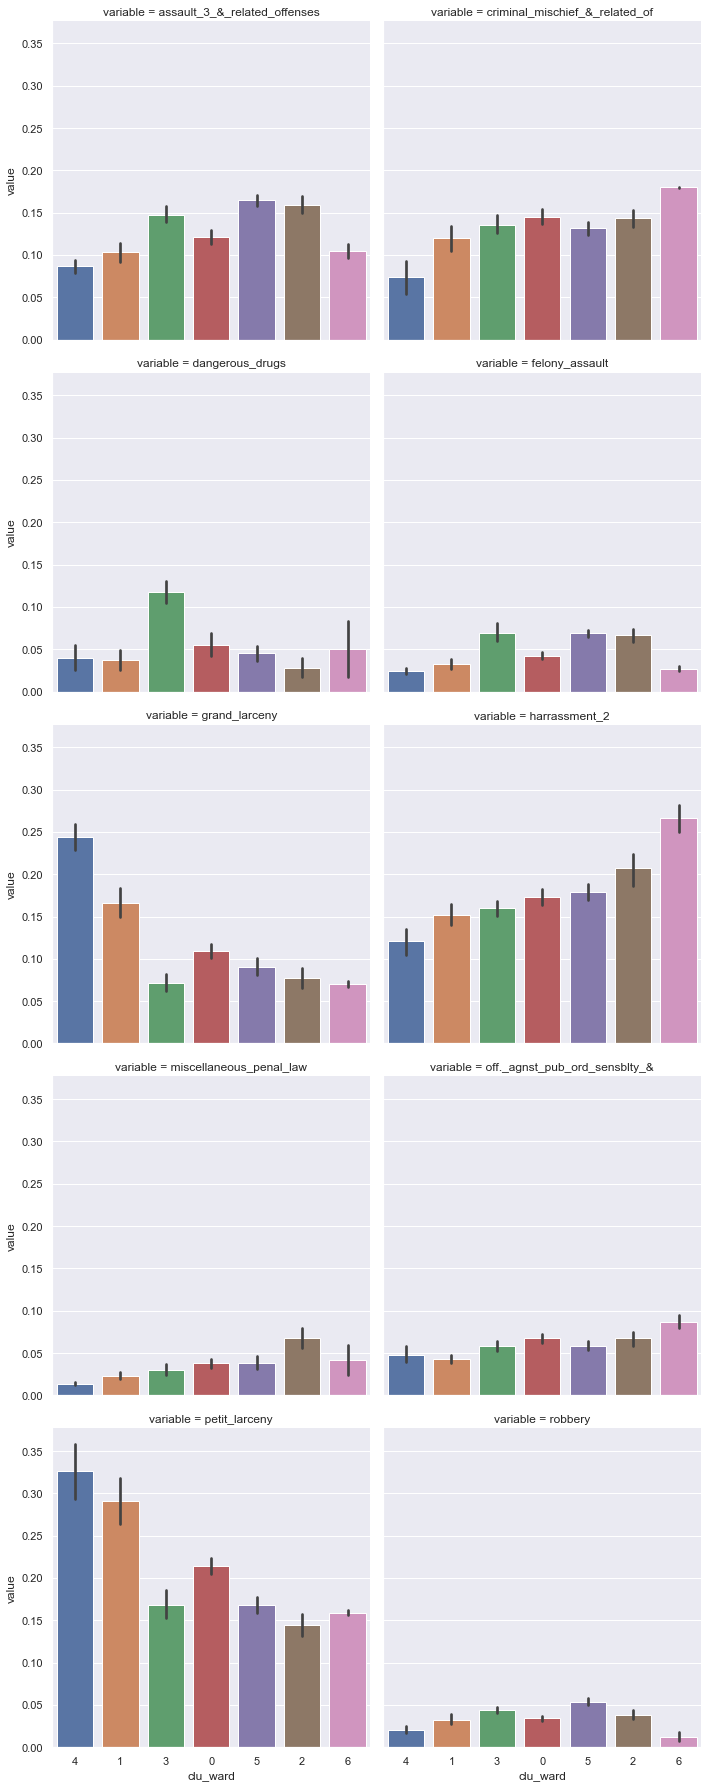

In [99]:
sns.catplot(data = tb_nypd_melt, x = 'clu_ward', y = 'value', col= 'variable', kind = 'bar', col_wrap = 2)